<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°10

## Objetivos del laboratorio

* Reforzar conceptos básicos de reducción de dimensionalidad.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [65]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [66]:
# cargar datos
df = pd.read_csv("BC.csv", sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:


1. Normalizar para las columnas numéricas con procesamiento **StandardScaler**.
2. Realice un gráfico de correlación. Identifique la existencia de colinealidad.
3. Realizar un ajuste PCA con **n_components = 10**. Realice un gráfico de la varianza y varianza acumulada. Interprete.
4. Devuelva un dataframe con las componentes principales.
5. Aplique al menos tres modelos de clasificación. Para cada modelo, calule el valor de sus métricas.

# Solución:

1. Primero identificamos las columnas numéricas


In [67]:
df = df.select_dtypes(include=np.number)
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Luego hacemos un escalamiento de los datos con StandardScaler

In [68]:
scaler = StandardScaler().fit(df)
data = scaler.transform(df) #data es numpy array con la data escalada
data = pd.DataFrame(data = data, columns = df.columns)

2. 

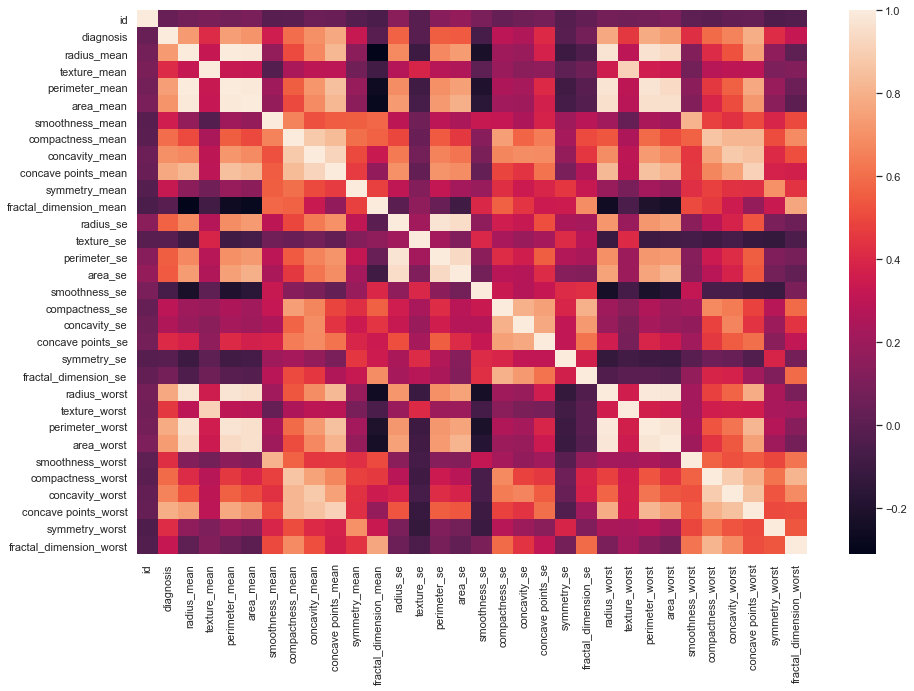

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr()) #no considero annot=True pues la matriz es grande

Podemos ver que hay muchas variables que presentan correlación lineal, esto lo podemos identificar mirando los coeficientes de correlación de Pearson

In [70]:
data.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


Apliquemos un filtro para saber que variables se correlacionan y consideremos que para un coeficiente mayor o igual que 0.95 se presenta correlación lineal

In [71]:
df.corr()>=0.95

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
diagnosis,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
radius_mean,False,False,True,False,True,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
texture_mean,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
perimeter_mean,False,False,True,False,True,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
area_mean,False,False,True,False,True,True,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
smoothness_mean,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
compactness_mean,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
concavity_mean,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
concave points_mean,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Luego, las variables que presentan correlación lineal son las siguientes con sus respectivos coeficientes

In [117]:
data.corr().unstack().sort_values()[950 : 991] #desde 950 hasta 991 hay coeficientes mayores a 0.9 y menores a 1
#no se consideraron los coeficientes muy cercanos a -1 pues el coeficientes mas negativo es -0.3 aproximadamente

concave points_mean   concave points_worst    0.910155
concave points_worst  concave points_mean     0.910155
texture_mean          texture_worst           0.912045
texture_worst         texture_mean            0.912045
concavity_mean        concave points_mean     0.921391
concave points_mean   concavity_mean          0.921391
area_se               perimeter_se            0.937655
perimeter_se          area_se                 0.937655
radius_mean           area_worst              0.941082
area_worst            radius_mean             0.941082
                      perimeter_mean          0.941550
perimeter_mean        area_worst              0.941550
area_se               radius_se               0.951830
radius_se             area_se                 0.951830
area_mean             perimeter_worst         0.959120
perimeter_worst       area_mean               0.959120
area_worst            area_mean               0.959213
area_mean             area_worst              0.959213
          

In [127]:
var_corr=[]
for (a,b) in data.corr().unstack().sort_values()[950 : 991].index:
    if (a,b) not in var_corr:
        print("Las variables",a ,"con",b ,"se correlacionan linealmente")
        var_corr.append((a,b))
        
        

Las variables concave points_mean con concave points_worst se correlacionan linealmente
Las variables concave points_worst con concave points_mean se correlacionan linealmente
Las variables texture_mean con texture_worst se correlacionan linealmente
Las variables texture_worst con texture_mean se correlacionan linealmente
Las variables concavity_mean con concave points_mean se correlacionan linealmente
Las variables concave points_mean con concavity_mean se correlacionan linealmente
Las variables area_se con perimeter_se se correlacionan linealmente
Las variables perimeter_se con area_se se correlacionan linealmente
Las variables radius_mean con area_worst se correlacionan linealmente
Las variables area_worst con radius_mean se correlacionan linealmente
Las variables area_worst con perimeter_mean se correlacionan linealmente
Las variables perimeter_mean con area_worst se correlacionan linealmente
Las variables area_se con radius_se se correlacionan linealmente
Las variables radius_se c

3. 

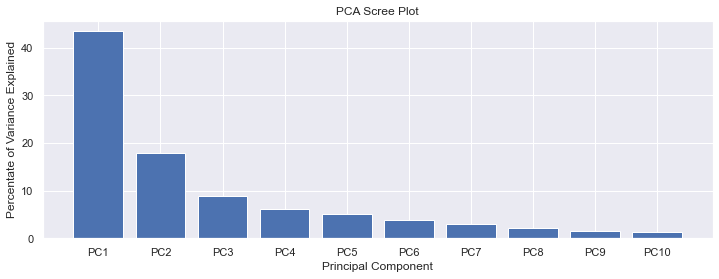

In [134]:
#definir modelo
pca = PCA(n_components=10)
#Ajuste del modelo
principalComponents = pca.fit_transform(data.values) #obs: se le entregan los datos escalados pues PCA es sensible a la escala
# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4',"PC5","PC6","PC7","PC8","PC9","PC10"]

plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Podemos observar que la primera componente que tiene PCA explica mas del 40% de la varianza de los datos, siendo predominante en esto se puede notar que con 10 componentes a partir de la cuarta componente se explica menos del 5% de la varianza lo cual nos da una estimación de cuantas componentes serían adecuadas considerar.

Para la varianza acumulada adoptemos la notación (por simplicidad del gráfico) que 

$$\text{Cum} j = \sum\limits_{k=1}^j PC_j $$

En donde $PC_j$ es la $j-$ésima componente principal, $j\in\{1,2,\ldots,10\}$

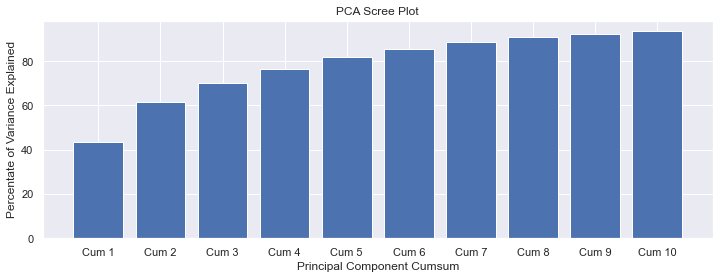

In [149]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['Cum 1', 'Cum 2','Cum 3','Cum 4','Cum 5','Cum 6','Cum 7','Cum 8','Cum 9','Cum 10']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,len(columns)+1), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

El gráfico de varianza acumulada nos está mostrando que al considerar desde 5 componentes en adelante no hay mucha ganancia de información con respecto a la varianza de los datos pues la diferencia entre sumar las 5 primeras componentes y sumar 10 es aproximadamente un 5%, ante esto podemos notar la relevancia de las primeras dos componentes que explican juntas el 60% de la varianza.

4.

In [155]:
pca_frame = pd.DataFrame(data = principalComponents, columns =['PC1', 'PC2', 'PC3', 'PC4',"PC5","PC6","PC7","PC8","PC9","PC10"])
target  = df[["diagnosis"]] #nuestro target en el problema sera predecir diagnosticos
newDataframe = pd.concat([pca_frame, target],axis = 1)
newDataframe.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,diagnosis
0,9.216724,2.136750,-0.996666,-3.701989,-1.254759,-1.375763,0.395570,2.211309,-0.160198,-0.060441,1
1,2.651244,-3.770741,-0.554319,-1.133416,0.553634,-0.122295,-0.308983,-0.067304,0.560140,-0.608084,1
2,5.900697,-1.010916,-0.467841,-0.933755,-0.194574,-0.402069,0.460241,-0.708039,-0.046968,-0.087962,1
3,7.137376,10.315636,-3.256828,-0.053782,-2.944418,-2.566999,1.962902,1.231421,1.311026,-1.197062,1
4,4.139263,-1.916891,1.465280,-2.877471,0.360750,1.240987,-0.242102,-1.093713,0.713385,-0.156539,1


5. Creamos una clase que automatice el proceso para reportar métricas de clasificación

In [166]:
from metrics_classification import *

class SklearnClassificationModels:
    def __init__(self,model,name_model):

        self.model = model
        self.name_model = name_model
        
    @staticmethod
    def test_train_model(X,y,n_size):
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=n_size , random_state=42)
        return X_train, X_test, y_train, y_test
    
    def fit_model(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        return self.model.fit(X_train, y_train) 
    
    def df_testig(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        model_fit = self.model.fit(X_train, y_train)
        preds = model_fit.predict(X_test)
        df_temp = pd.DataFrame(
            {
                'y':y_test,
                'yhat': model_fit.predict(X_test)
            }
        )
        
        return df_temp
    
    def metrics(self,X,y,test_size):
        df_temp = self.df_testig(X,y,test_size)
        df_metrics = summary_metrics(df_temp)
        df_metrics['model'] = self.name_model
        
        return df_metrics

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#split
X = newDataframe[['PC1', 'PC2', 'PC3', 'PC4',"PC5","PC6","PC7","PC8","PC9","PC10"]]
Y = newDataframe["diagnosis"]

In [178]:
# metrics 

import itertools

# nombre modelos
names_models = ["Logistic",
         "RBF SVM", 
         "Decision Tree", 
         "Random Forest"
]

# modelos
classifiers = [
    LogisticRegression(),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
]

list_models = list(zip(names_models,classifiers))

frames = []
for modelo in list_models:
    fit_model =  SklearnClassificationModels(modelo[1],modelo[0])
    df = fit_model.metrics(X,Y,0.2)    
    frames.append(df)


C:\Users\DELL\anaconda3\envs\mat281\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [179]:
# juntar resultados
pd.concat(frames)


,accuracy,recall,precision,fscore,model
0,0.9912,0.9884,0.9931,0.9906,Logistic
0,0.6228,0.5000,0.3114,0.3838,RBF SVM
0,0.9737,0.9651,0.9797,0.9716,Decision Tree
0,0.9561,0.9464,0.9605,0.9526,Random Forest
